In [1]:
### install packages
install.packages("twitteR", repos="http://cran.rstudio.com/")       
install.packages('ggmap', repos="http://cran.rstudio.com/")
install.packages("maptools",repos="http://cran.rstudio.com/")
install.packages("maps", repos="http://cran.rstudio.com/")
install.packages("plyr",repos="http://streaming.stat.iastate.edu/CRAN")

Installing package into 'C:/Users/tsankhe/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'twitteR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tsankhe\AppData\Local\Temp\Rtmp2DPUx9\downloaded_packages


Installing package into 'C:/Users/tsankhe/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'ggmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tsankhe\AppData\Local\Temp\Rtmp2DPUx9\downloaded_packages


Installing package into 'C:/Users/tsankhe/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'maptools' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'maptools'"


The downloaded binary packages are in
	C:\Users\tsankhe\AppData\Local\Temp\Rtmp2DPUx9\downloaded_packages


Installing package into 'C:/Users/tsankhe/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'maps' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'maps'"


The downloaded binary packages are in
	C:\Users\tsankhe\AppData\Local\Temp\Rtmp2DPUx9\downloaded_packages


Installing package into 'C:/Users/tsankhe/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'plyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'plyr'"


The downloaded binary packages are in
	C:\Users\tsankhe\AppData\Local\Temp\Rtmp2DPUx9\downloaded_packages


In [9]:
library(twitteR)
library(maps)
library(maptools)
library(ggmap)
library(plyr)

#twitter API authentication
api_key<- #api key here
api_secret<- #api secret key here
access_token<- #access token here
access_secret<- #access secret here

setup_twitter_oauth(api_key, api_secret, access_token, access_secret)

Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()
Loading required package: ggplot2

Attaching package: 'plyr'

The following object is masked from 'package:maps':

    ozone

The following object is masked from 'package:twitteR':

    id



[1] "Using direct authentication"


In [72]:
searchTerm<-"#PatriotsNation OR @Patriots"    #Winning team
tweets<- searchTwitter(searchTerm,n=10000) 
tweetDF <- twListToDF(tweets) 

### convert tweets to dataframe using twListToDF, extract users using lookupUsers and convert to dataframe

In [73]:
userName<- tweetDF$screenName
head(userName)
users <- lookupUsers(userName) 
userDF <- twListToDF(users)

[1] "Fatima_1506"    "PresNewsTalk"   "SarahUch"       "mickzertuche89"
[5] "cchampps"       "Mellard1121"

In [ ]:
### remove NA and blank spaces
coordinates<-userDF[!is.na(userDF$location),]
coordinates<-coordinates[!coordinates$location=="",]
head(coordinates$location)

In [76]:
nrow(coordinates)

[1] 3068

In [77]:
write.csv(coordinates,file="locationsToGeocode.csv")

In [ ]:
geocodeQueryCheck(userType = "free")

In [ ]:
### read first 2500 rows  
location<- read.csv(file="locationsToGeocode.csv",nrows=2500)
visited <- as.character(location$location)
#print(visited)

### use geocode api from ggmap package to retrieve coordinates for the user locations obtained above

In [81]:
ll.visited <- geocode(visited,override_limit=TRUE)

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=401&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=estado%20de%20M%E9xico&sensor=false
Warning message in readLines(connect, warn = FALSE):
"cannot open URL 'http://maps.googleapis.com/maps/api/geocode/json?address=estado%20de%20M%E9xico&sensor=false': HTTP status was '400 Bad Request'"Warning message in FUN(X[[i]], ...):
"  geocoding failed for "estado de México".
  if accompanied by 500 Internal Server Error with using dsk, try google."Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=South%20Boston,%20MA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Langlade%20County,%20Wisconsin&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Massachusetts&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Interna

In [82]:
mapped<-ll.visited[!is.na(ll.visited$lat),]
nrow(mapped)
write.csv(mapped, file="1.csv")

[1] 663

In [27]:
### read next 2500 rows and copy header
#header <- read.table('locationsToGeocode1.csv', nrows = 1, header = FALSE,, sep =',',fill = TRUE )

data   <- read.table('locationsToGeocode.csv', skip = 2500,nrows=2500, header = FALSE, sep =',',fill = TRUE)
#colnames( data ) <- unlist(header)
#head(data)
visited <- as.character(data$V13)


In [28]:
# next 2500 entries to geocode 

ll.visited <- geocode(visited,override_limit=TRUE)
mapped<-ll.visited[!is.na(ll.visited$lat),]
nrow(mapped)
write.csv(mapped, file="2.csv") 

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Michigan,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cauldcots,%20Scotland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Adana,%20Turkey&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kayseri,%20T%FCrkiye&sensor=false
Warning message in readLines(connect, warn = FALSE):
"cannot open URL 'http://maps.googleapis.com/maps/api/geocode/json?address=Kayseri,%20T%FCrkiye&sensor=false': HTTP status was '400 Bad Request'"Warning message in FUN(X[[i]], ...):
"  geocoding failed for "Kayseri, Türkiye".
  if accompanied by 500 Internal Server Error with using dsk, try google."Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tarsus,%20Mersin&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bor,%20Nig

[1] 499

### read both geocoded locations files and merge them

In [5]:
firstFile <- read.csv("1.csv", header=T, sep=",")
secondFile <- read.csv("2.csv", header=T, sep=",")

mergedFile <- rbind(firstFile,secondFile)

In [6]:
### remove NA entries

mergedFile<-na.omit(mergedFile)
nrow(mergedFile)
write.csv(mergedFile,"geocoded.csv")

[1] 826

In [7]:
lonlat<-read.csv(file="geocoded.csv")
lonlat<-na.omit(lonlat)
#lonlat$locations<-paste(lonlat$lon,",",lonlat$lat)
#head(lonlat)

#### Used count function from plyr package to count lat,long pairs and their frequencies(which represents cities), hence grouped by cities

In [10]:
count<-count(lonlat,c("lon","lat"))

In [11]:
head(count)


lon,lat,freq
-157.8583,21.30694,1
-122.6765,45.52306,3
-122.6716,45.63184,2
-122.5032,37.95989,1
-122.4680,37.76074,1
-122.4290,37.76369,1


#### Used counted entries table to plot points on map of states, using cex parameter to vary size of points as a funtions of frequencies(divided by 7 to regularise the size of blob) of the co-ordinates. Used text to diplay the abbreviations of states on map.

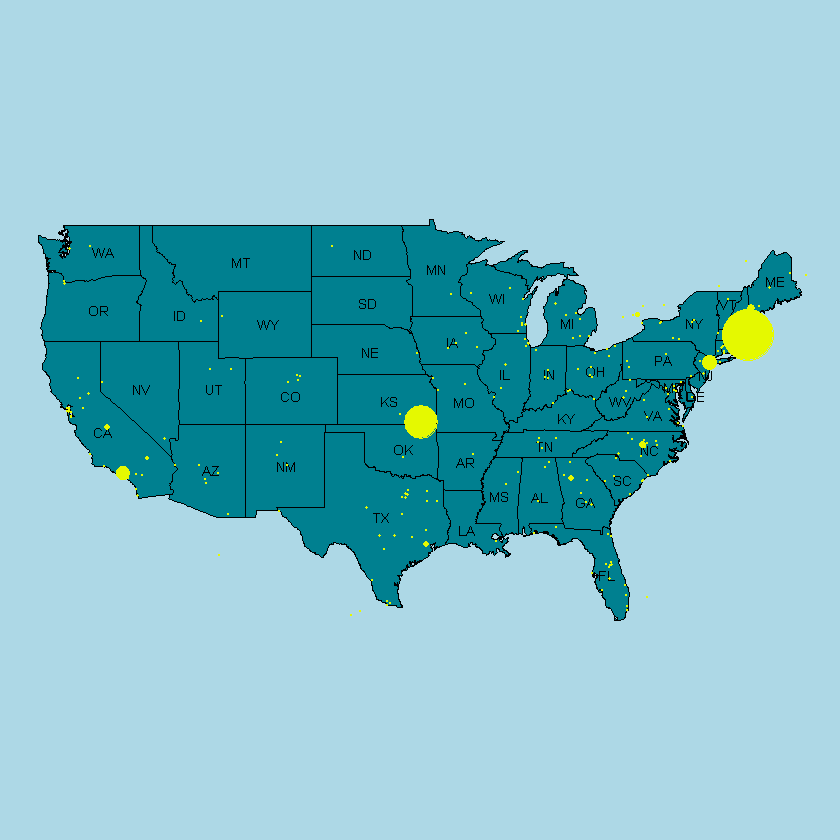

In [46]:
map("state", fill=TRUE, col="#008090", bg="lightblue", mar=c(0,1,0,0))
text(x=state.center$x, y=state.center$y,state.abb, cex=0.7)
points(count$lon,count$lat, col="#e5f900", pch=20, cex=(count$freq/7))


# References

### http://stat.ethz.ch/R-manual/R-devel/library/utils/html/read.table.html
### https://www.r-bloggers.com/perform-a-function-on-each-file-in-r/
### http://geoffjentry.hexdump.org/twitteR.pdf
### https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/points.html
### https://kb.iu.edu/d/bcrr
### https://www.rdocumentation.org/packages/rgdal/versions/1.2-5/topics/project
### http://stat.ethz.ch/R-manual/R-devel/library/base/html/cbind.html
